# FP Tree
FP tree is the core concept of the whole FP Growth algorithm. 
- Briefly speaking, the FP tree is the compressed representation of the itemset database. 
- The tree structure not only reserves the itemset in database but also keeps track of the association between itemsets
- The tree is constructed by taking each itemset and mapping it to a path in the tree one at a time. 
- The whole idea behind this construction is that More frequently occurring items will have better chances of sharing items. 
- We then mine the tree recursively to get the frequent pattern. 
- Pattern growth, the name of the algorithm, is achieved by concatenating the frequent pattern generated from the conditional FP trees.

# FP Growth Algorithm
- The reason why FP Growth is so efficient is that it’s a divide-and-conquer approach.
- It implemented tree, linked list, and the concept of depth-first search. 
- The process can be split into two main stages, each stage can be further divided into two steps.

# Stage 1: FP tree construction

Step 1: Cleaning and sorting
- For each transaction, we first remove the items that are below the minimum support. 
- Then, we sort the items in frequency support descending order.

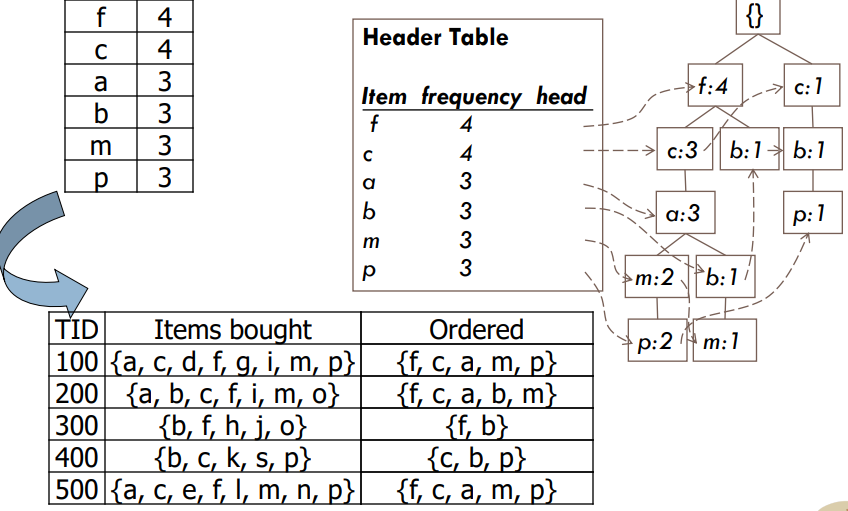

Step 2: Construct FP tree, header table with cleaned itemsets
- Loop through the cleaned itemsets, map it to the tree one at a time. 
- If any item already exists in the branch, they share the same node and the count is incremented. 
- Else, the item will be on the new branch created.
- The header table is also constructed during this procedure. 
- There’s a linked list for each unique item in the transactions.
-  With the linked list, we can find the occurrence of the item on the tree in a short period of time without traversing the tree.
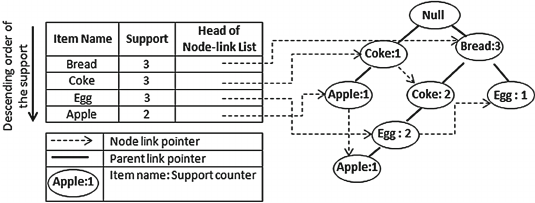

# Stage 2: Mine the main tree and conditional FP trees

Step 1: Divide the main FP tree into conditional FP trees 
- Staring from each frequent 1-pattern, we create conditional pattern bases with the set of prefixes in the FP tree.
- Then, we use those pattern bases to construct conditional FP trees with the exact same method in Stage 1.

Step 2: Mine each conditional trees recursively
- The frequent patterns are generated from the conditional FP Trees. 
- One conditional FP tree is created for one frequent pattern. 
- The recursive function we used to mine the conditional trees is close to depth-first search. I
- t makes sure that there is no more trees can be constructed with the remaining items before moving on.

Like Apriori, FP-Growth(Frequent Pattern Growth) algorithm helps us to do Market Basket Analysis on transaction data. 
- FP-Growth is preferred to Apriori for the reason that Apriori takes more execution time for repeated scanning of the transaction dataset to mine the frequent items . 
- FP-Growth builds a compact-tree structure and uses the tree for frequent itemset mining and generating rules.

# Basic Terminology
Item-set: A set of one or more items.

Support_Count (X): Frequency/Count of occurrence of an itemset X.

Support (X => Y): Percentage of transactions that contain both X and Y. [X U Y]

Confidence (X => Y): Percentageof transactions, containing X, that also contains Y. [P(Y|X)]

# How Does FP-Growth Algorithm Work
- FP-Growth generates an FP Tree to mine the most frequent pattern. 
- Each node of the tree represents an item of the item-set. 

STEP 1:
- Compute the frequency of each item in an item-set, across all the transactions in the dataset. 
- Next, select only those items that have support_count greater than or equal to the support_threshold value. 
- Sort these items chosen in decreasing order of their frequency.
- Generate ordered item-sets with the selected items.

STEP 2:
- Construct FP Tree using only the ordered itemsets. 
- Initially, the support count of any new node will be 1. The root node is represented by NULL.
- Iterate through all the ordered itemsets and add an item node to the tree in the order of occurrence in the item-set.
- If a subset of the item-set is already present in the tree, then just increase the support_count of those items otherwise create a new node in the tree and set its support_count to 1.

STEP 3:
Generate a Conditional Pattern Base for each of the selected items.
Conditional pattern base is nothing but a list of all the paths from the root that leads to the given item node in the FP tree.

STEP 4:
- Generate Conditional Frequent Pattern Tree for each of the selected items.
- That is nothing but a set of all the elements which are common across all the paths in the conditional pattern base.
- Also, the support_count of the elements is just a sum of the support_count of all the paths.

STEP 5:
- Generate Frequent Patterns using the Conditional FP Tree.
- That is done by grouping the items in the conditional FP Tree with the respective selected item.


Generate Association Rules from Frequent Patterns
- Once we have the frequent patterns generated, it is easy to get the association rules. 
- For the final step, we need to identify the set of valid rules. 
- That is achieved by calculating the confidence of rules and checking the confidence_threshold against the cutoff.

Confidence Formula FP-Growth


In [2]:
!pip install pyfpgrowth

     |████████████████████████████████| 1.6MB 8.1MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5479 sha256=b7e510cab016bf1197346ae54cba9105260cd5487abc41bd7fdbd38ad4372028
  Stored in directory: /root/.cache/pip/wheels/3b/3f/0d/a04bb8b17887c1eca7d0f1a48d4aa0c09c96eb221ff7fa56c1
Successfully built pyfpgrowth


In [2]:
import pyfpgrowth
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail (1).xlsx


In [ ]:
data = pd.read_excel('Online Retail (1).xlsx')
data.head()

Preparing the transactions list by grouping the items in each of the InvoiceNo



In [6]:
grouped_df = data.groupby(['InvoiceNo'])
grouped_df

In [10]:
transactions = []
for group, pdf in grouped_df:
    transactions.append(pdf['Description'].values.tolist())

Generating the frequent patterns for these transactions using find_frequent_patterns function of the pyfpgrowth package.
- Here, the support_threshold is taken as 2.

In [13]:
import sys
print(sys.getrecursionlimit())

1000


In [15]:
sys.setrecursionlimit(1500)
print(sys.getrecursionlimit())


1500


In [4]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 2)

NameError: ignored

In [3]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.8)

NameError: ignored